In [4]:
from IPython.display import Image ## Use to display the image
import json ## use later to demonstrate some file

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparing-the-connection" data-toc-modified-id="Preparing-the-connection-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparing the connection</a></span><ul class="toc-item"><li><span><a href="#Creating-a-Project-in-developer.adobe.com" data-toc-modified-id="Creating-a-Project-in-developer.adobe.com-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating a Project in developer.adobe.com</a></span></li><li><span><a href="#Creating-a-config-file-via-aepp" data-toc-modified-id="Creating-a-config-file-via-aepp-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating a config file via aepp</a></span></li></ul></li></ul></div>

This notebook will guide you through the setup of `aepp`.\
`aepp` is the python module to connect to the Adobe Experience Platform (AEP) API.\
It covers the endpoints available from the API documentation : <https://developer.adobe.com/experience-platform-apis/> \

In order to access the Adobe Experience Platform, one need to have a created a project in developer.adobe.com with the corresponding right to AEP.\
AEP is specific as it also require that you set role and permission to that project directly in AEP permission panel.

`aepp` is divided by modules.\
The main reason is that you may not want to load the whole code of other module, that can be quite extensive, if you do not want to use it.\
Therefore, it is required to load the module you want to use.\
In order to know which module are required, you would need to know and look at each service provided by AEP.\
The main modules that you will most likely interact with are: 
* schema : Schema registry API
* catalog : Dataset and Batch analysis
* accesscontrol : View available and active user permissions.
* customerprofile : Manage merge policies and other Profile-related resources.
* dataaccess : retrieving batch data
* dataprep : Mapper and Data Preparation capability
* datasets : Manage usage labels for existing datasets within the Data Lake.
* destination : Author a destination in the Experience Platform catalog.
* flowservice : Flow Service API is used to ingest data from external sources into Experience Platform and to connect to destinations and activate data.
* identity : Manage identities, namespaces, and clusters linked to the Identity Graph.
* ingestion : Bring data into Platform through batch ingestion or HTTP stream
* observability : View metrics on various Platform activities.
* policy : Manage data usage labels and policies.
* privacyservice : Requires an additional Product in the project to manage Privacy Service requests. 
* queryservice : access to the queries log or generating queries, Batch or Interactive
* sandboxes : manage the sandboxes of your organiation
* segmentation : manage the segmentation interface for AEP.

# Preparing the connection

`aepp` is capable to be connected to the AEP API via different means: 
* import a config file
* using variables from your computer system

In this guide, we will focus on using the using a configuration file, because this is the main type of connection that is used.\
The usage of both method are fully described here: [getting started on aepp](https://github.com/adobe/aepp/blob/main/docs/getting-started.md)

## Creating a Project in developer.adobe.com

The first requirement for the aepp connection to be establish is to create a project in developer.adobe.com.\
A project would look like this on the website: 

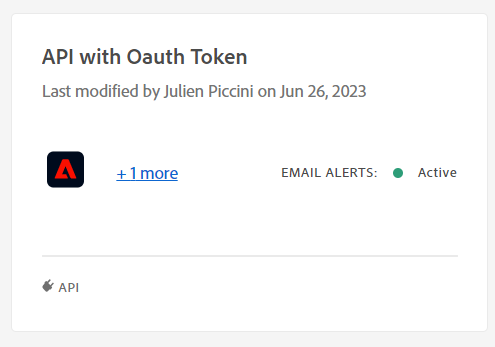

In [3]:
Image(filename="developer.adobe.project_list.png")

You can then go into the project and connect to the specific API required.\
In that case, the AEP solution, in the screenshot below, you can see that I am also connected to the CJA API via that project.\
Nowadays (in 2023/2024), the default credential type is Oauth Server-to-Server for all services.

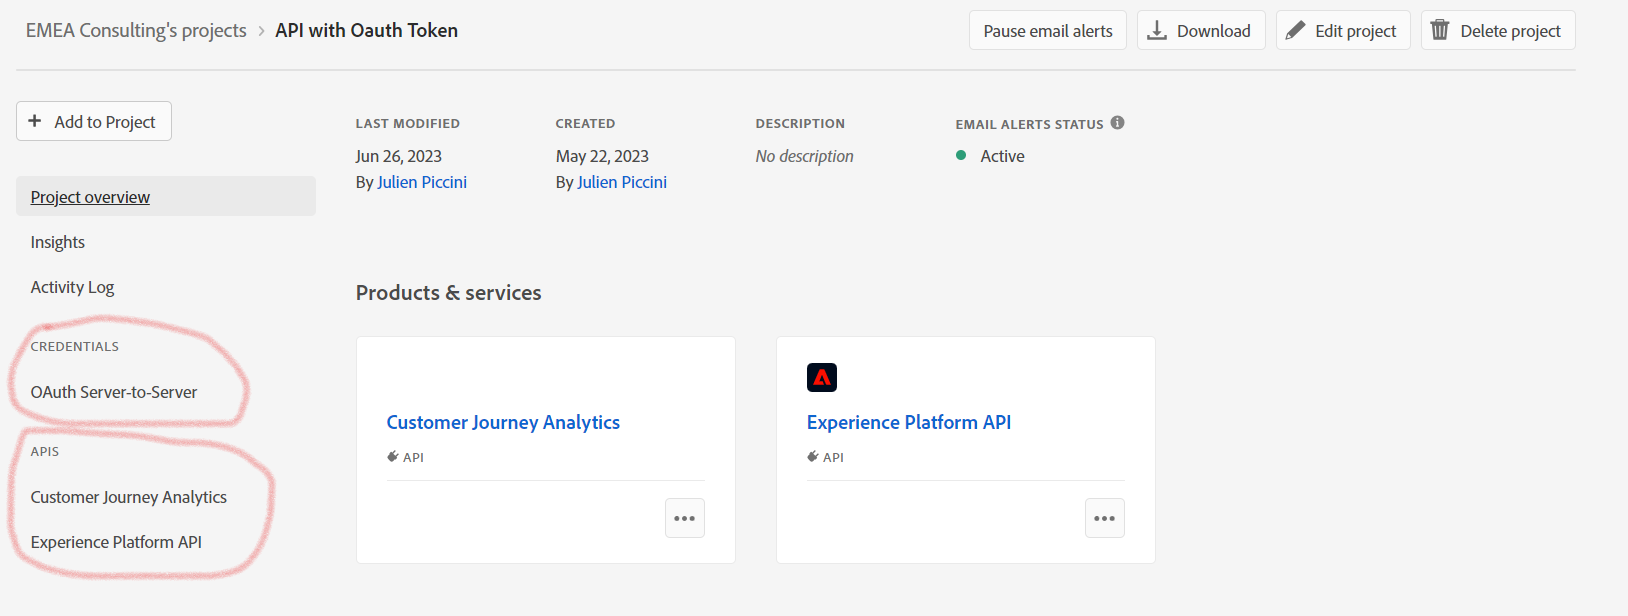

In [4]:
Image(filename="developer.adobe.project_overview.png")

Once you have added these API connection, you can reach/click the `Oauth Server-to-Server` to see all of the details.\

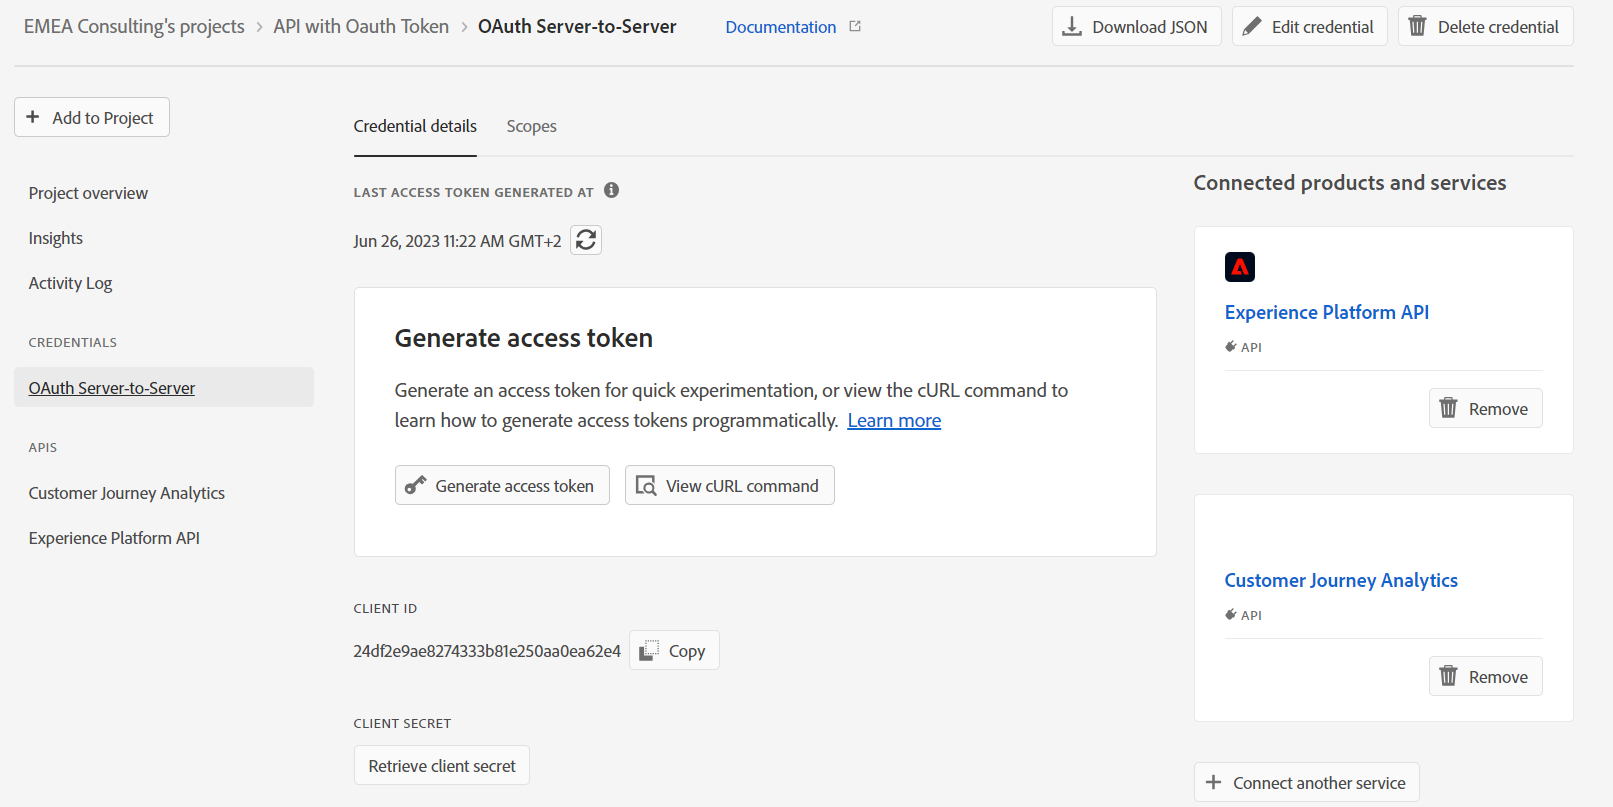

In [5]:
Image(filename="developer.adobe.project_oauth_detail.png")

This page can then be let open for the next steps

## Creating a config file via aepp

the first thing you would need to do is to load the aepp module. 

In [2]:
import aepp

Once the library has been imported into your notebook, you can use the `createConfigFile` method to create a config file.\
This will create a `JSON` file in your running folder. \
You can use the following parameter:
* destination : the name of your file (and possibly the path if you do not want to create it in the same folder)
* sandbox : if you want to predefine a sandbox in the file. 
* auth_type : By default the OauthV2 is being selected.
* environment : Made for AEP developer, clients or customers of AEP should not change this setting. 

In [3]:
aepp.createConfigFile('example.json')

The file will show the following entry:

In [7]:
with open('example.json','r') as f: ## reading the file with json module
    file = json.load(f)
print(json.dumps(file,indent=2))

{
  "org_id": "<orgID>",
  "client_id": "<client_id>",
  "secret": "<YourSecret>",
  "sandbox-name": "prod",
  "environment": "prod",
  "scopes": "<scopes>"
}


Once the file has been created, you can modify the different values inside, you will need to follow the values provided in the developer.adobe.com project.\ 
My recommendation would be to rename the file as well so you do not overwrite it by running the same cell that created the file again. 

Once the values has been changed, you can import the file.\
The best practice is to use the `connectInstance` parameter in order to create an instance that saved the environment used.\
You can also override the sandbox during the import function so you do not have to create multipe files.

In [8]:
prod = aepp.importConfigFile('myconfigFile.json',sandbox='prod',connectInstance=True)

You can then use the instance created, `prod` in that case, to your different modules, using the `config` parameter during the instantiation. We will see that in the next guide / template notebook. 